<a href="https://colab.research.google.com/github/leonardo3108/IA368dd/blob/main/Precision_problems_with_CISI_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and load the CISI Query and Relevant Docs files

In [1]:
!wget https://ir.dcs.gla.ac.uk/resources/test_collections/cisi/cisi.tar.gz

--2023-02-22 18:50:02--  https://ir.dcs.gla.ac.uk/resources/test_collections/cisi/cisi.tar.gz
Resolving ir.dcs.gla.ac.uk (ir.dcs.gla.ac.uk)... 130.209.240.253
Connecting to ir.dcs.gla.ac.uk (ir.dcs.gla.ac.uk)|130.209.240.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 775144 (757K) [application/gzip]
Saving to: ‘cisi.tar.gz’

cisi.tar.gz         100%[===================>] 756.98K  1.37MB/s    in 0.5s    

2023-02-22 18:50:04 (1.37 MB/s) - ‘cisi.tar.gz’ saved [775144/775144]



In [2]:
!tar -xzvf cisi.tar.gz

CISI.ALL
CISI.BLN
CISI.QRY
CISI.REL


In [6]:
queries_path = 'CISI.QRY'
queries = []
with open(queries_path, 'r') as f:
    query_text = ''
    for line in f:
        if line.startswith('.I'):
            if query_text:
                queries.append(query_text)
            query_text = ''
        elif line.startswith('.W'):
            query_text = line[3:]
        else:
            query_text += line
    if query_text:
        queries.append(query_text)

In [21]:
relevant_docs = {}
for query_id in range(1, len(queries) + 1):
    relevant_docs[query_id] = []

In [22]:
for line in open('CISI.REL'):
    query_id, document_ID = [int(id) for id in line.split()[:2]]
    relevant_docs[query_id].append(document_ID - 1)

# Counts relevant docs per query

In [23]:
for query_id in range(1, len(queries) + 1):
    relevant_docs[query_id]= len(set(relevant_docs[query_id]))

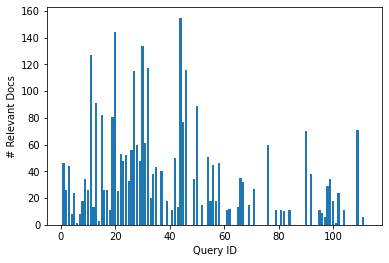

In [34]:
import matplotlib.pyplot as plt
plt.bar(relevant_docs.keys(), relevant_docs.values())
plt.xlabel('Query ID')
plt.ylabel('# Relevant Docs')
plt.show()

# Queries with less than 10 relevant docs

In [44]:
print(f'Queries with less than 10 relevant docs:')
for query_id in relevant_docs.keys():
    quantity = relevant_docs[query_id]
    if quantity < 10:
        print(f'\tquery ID {query_id}: {quantity}')

Queries with less than 10 relevant docs:
	query ID 4: 8
	query ID 6: 1
	query ID 7: 8
	query ID 14: 3
	query ID 36: 0
	query ID 38: 0
	query ID 40: 0
	query ID 47: 0
	query ID 48: 0
	query ID 51: 0
	query ID 53: 0
	query ID 59: 0
	query ID 60: 0
	query ID 63: 0
	query ID 64: 0
	query ID 68: 0
	query ID 70: 0
	query ID 72: 0
	query ID 73: 0
	query ID 74: 0
	query ID 75: 0
	query ID 77: 0
	query ID 78: 0
	query ID 80: 0
	query ID 83: 0
	query ID 85: 0
	query ID 86: 0
	query ID 87: 0
	query ID 88: 0
	query ID 89: 0
	query ID 91: 0
	query ID 93: 0
	query ID 94: 0
	query ID 96: 9
	query ID 97: 6
	query ID 101: 1
	query ID 103: 0
	query ID 105: 0
	query ID 106: 0
	query ID 107: 0
	query ID 108: 0
	query ID 110: 0
	query ID 111: 6
	query ID 112: 0


# Ceil for precision @ 10 in CISI dataset

In [47]:
total = 0
for query_id in relevant_docs.keys():
    total += min(relevant_docs[query_id], 10)
total / 10 / len(queries)

0.6446428571428572